# Exercise Set 4
## Stationary checking:

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
sns.set()

In [2]:
def sigma(x, tau):
    """calculate stationary

    Args:
        x (array): timeseris data
        tau (int): 

    Returns:
        float: stationary for timeseries
    """
    N = len(x)
    M = int(N/tau)
    sigma_i = np.zeros(M)
    for i in range(M):
        sigma_i[i] = np.sqrt(np.mean((x[i*tau:(i+1)*tau] - np.mean(x[i*tau:(i+1)*tau]))**2))
    return np.mean(sigma_i)

In [7]:
A = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/FBM.txt")
B = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/FGN.txt")
Tau = range(1,len(A)//2 +100)

In [8]:
SigmaA = []
SigmaB = []
for t in Tau:
    SigmaA.append(sigma(A,t))
    SigmaB.append(sigma(B,t))


## A:

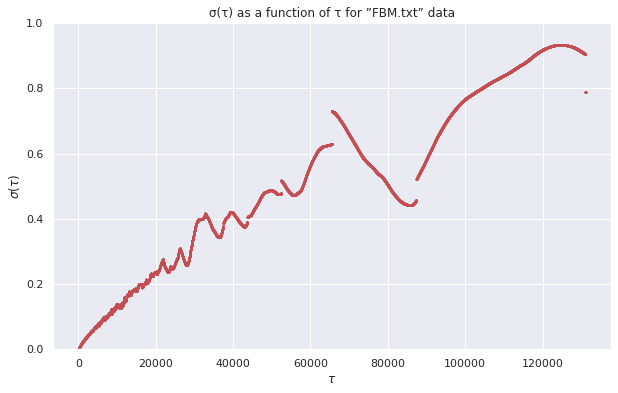

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(Tau, SigmaA, s=0.2, c="r")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\sigma(\tau)$")
plt.ylim(0,1)
plt.title("σ(τ) as a function of τ for ”FBM.txt” data")
plt.show()

As we can see the FBM data is non-stationary data.

## B:

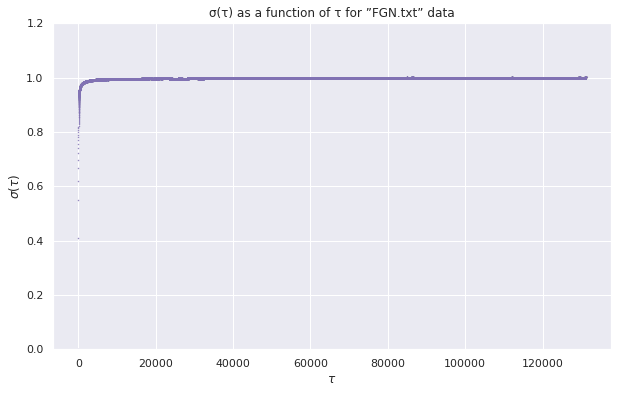

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(Tau, SigmaB, s=0.2, c="m")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\sigma(\tau)$")
plt.ylim(0,1.2)
plt.title("σ(τ) as a function of τ for ”FGN.txt” data")
plt.show()

As we can see the FBM data is stationary data.

## C:

In [26]:
C = np.zeros(len(A))
for i in range(len(A)-1):
    C[i] = A[i+1] - A[i]

In [27]:
SigmaC = []
for t in Tau:
    SigmaC.append(sigma(C,t))

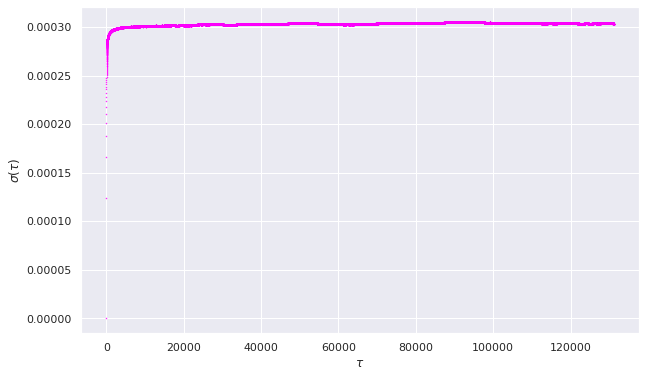

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(Tau, SigmaC, s=0.2, c="magenta")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\sigma(\tau)$")
plt.show()

The constructed signal is stationary data.

## D:

In [30]:
D = np.zeros(len(B))
for i in range(len(B)):
    D[i] = np.sum(B[:i])

In [31]:
SigmaD = []
for t in Tau:
    SigmaD.append(sigma(D,t))

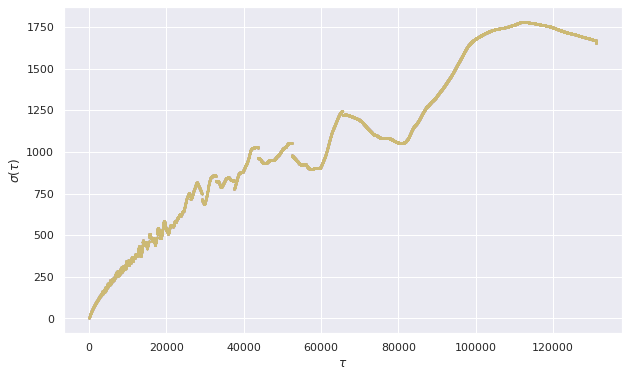

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(Tau, SigmaD, s=0.2, c="y")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\sigma(\tau)$")
plt.show()

The constructed signal is non-stationary data.

# E:
## The stationary intensity:

In [3]:
x0 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FBM_0.100")
x1 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FBM_0.300")
x2 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FBM_0.500")
x3 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FBM_0.700")
x4 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FBM_0.900")
x5 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FGN_0.100")
x6 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FGN_0.300")
x7 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FGN_0.500")
x8 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FGN_0.700")
x9 = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW4/Data_E/FGN_0.900")


In [142]:
tau = range(1, len(x0))

In [143]:
sigma0, sigma1, sigma2, sigma3, sigma4, sigma5, sigma6, sigma7, sigma8, sigma9 = [], [], [], [], [], [], [], [], [], []
for t in tau:
    sigma0.append(sigma(x0, t))
    sigma1.append(sigma(x1, t))
    sigma2.append(sigma(x2, t))
    sigma3.append(sigma(x3, t))
    sigma4.append(sigma(x4, t))
    sigma5.append(sigma(x5, t))
    sigma6.append(sigma(x6, t))
    sigma7.append(sigma(x7, t))
    sigma8.append(sigma(x8, t))
    sigma9.append(sigma(x9, t))


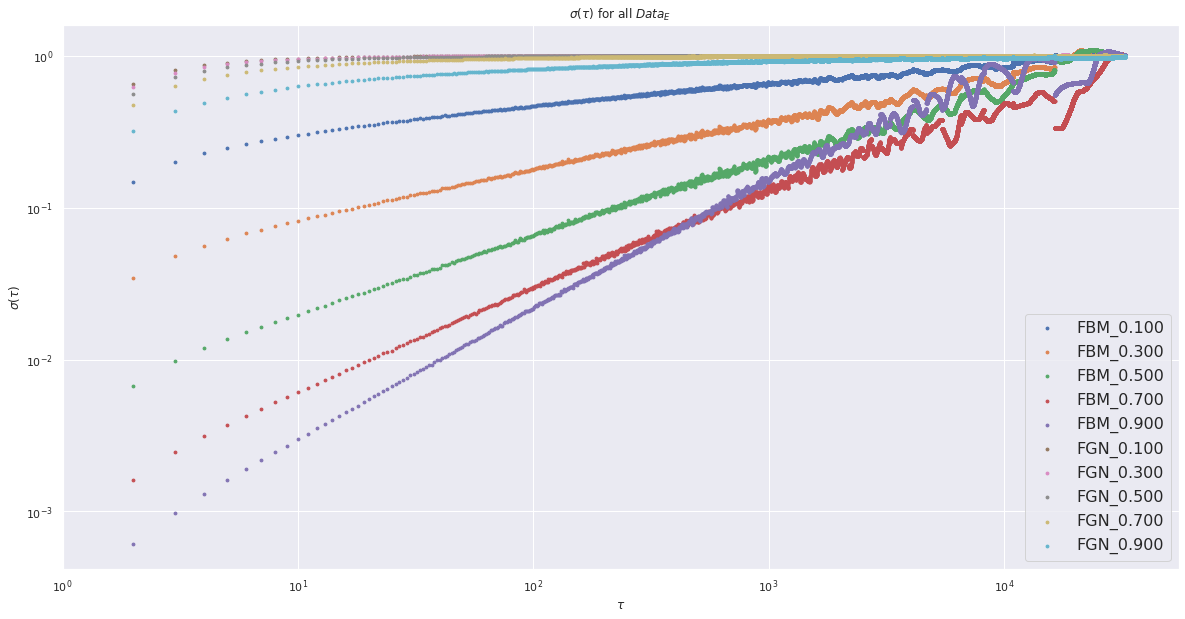

In [147]:
plt.figure(figsize=(20,10))
plt.scatter(tau, sigma0, s=8, label="FBM_0.100")
plt.scatter(tau, sigma1, s=8, label="FBM_0.300")
plt.scatter(tau, sigma2, s=8, label="FBM_0.500")
plt.scatter(tau, sigma3, s=8, label="FBM_0.700")
plt.scatter(tau, sigma4, s=8, label="FBM_0.900")
plt.scatter(tau, sigma5, s=8, label="FGN_0.100")
plt.scatter(tau, sigma6, s=8, label="FGN_0.300")
plt.scatter(tau, sigma7, s=8, label="FGN_0.500")
plt.scatter(tau, sigma8, s=8, label="FGN_0.700")
plt.scatter(tau, sigma9, s=8, label="FGN_0.900")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\sigma(\tau)$")
plt.legend(fontsize="16")
plt.title(r"$\sigma(\tau)$ for all $Data_E$ ")
plt.loglog()
plt.xlim(1,)
plt.show()

Since we cannot find the stationary regime for all FBM data, we only find $\tau_{stationary}$ for FGN data.

In [148]:
def line(x,b):
    """function of horizontal line"""
    return b

In [149]:
parameter5, _ = curve_fit(line, tau, sigma5)
parameter6, _ = curve_fit(line, tau, sigma6)
parameter7, _ = curve_fit(line, tau, sigma7)
parameter8, _ = curve_fit(line, tau, sigma8)
parameter9, _ = curve_fit(line, tau, sigma9)

In [173]:
def find_t(Sigma, para, err=0.001):
    """find tau stationary

    Args:
        Sigma (array): sigma as function of tau
        para (array): the parameter of line that find from scipy
        err (float, optional): Defaults to 0.001.

    Returns:
        float: tau stationary
    """
    I = []
    for i in range(len(Sigma)):
        if abs(Sigma[i] - para) < err:
            I.append(i)
        if len(I) > 100:
            break
    return I[99]


In [174]:
t5 = find_t(sigma5, parameter5)
t6 = find_t(sigma6, parameter6)
t7 = find_t(sigma7, parameter7)
t8 = find_t(sigma8, parameter8)
t9 = find_t(sigma9, parameter9)

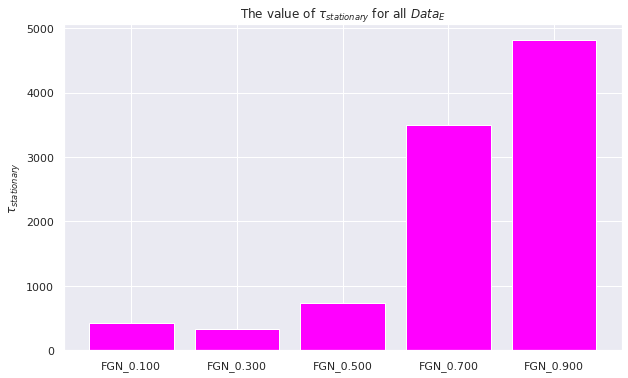

In [175]:
plt.figure(figsize=(10,6))
plt.bar(x=["FGN_0.100", "FGN_0.300", "FGN_0.500", "FGN_0.700", "FGN_0.900"], height=[t5, t6, t7, t8, t9], color="magenta")
plt.ylabel(r"$\tau_{stationary}$")
plt.title(r"The value of $\tau_{stationary}$ for all $Data_E$")
plt.show()